In [486]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
import pandas as pd


%matplotlib inline

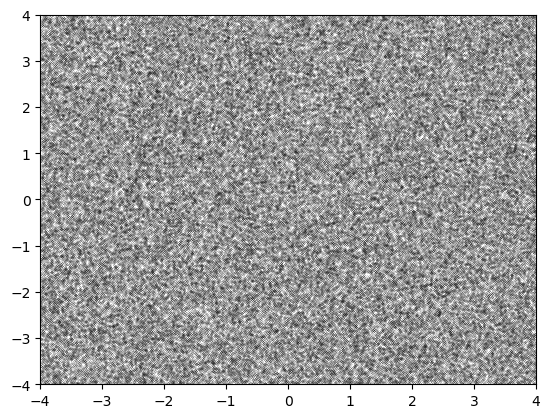

In [348]:
zix = np.random.uniform(low = -4, high = 4, size = 150000)
ziy = np.random.uniform(low = -4, high = 4,size = 150000)


                 

plt.scatter(zix, ziy, color = 'black', s = 0.01)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()



In [349]:
## zi ==> posição inicial
# zf ==> poisição final dps da deflexão

e1 = 0.5     #=> fração da massa 
r1x = -0.75    #=> posição da lente j em relação a origem
r1y = 0
e2 = 0.5     #=> fração da massa 
r2x = 0.75
r2y = 0

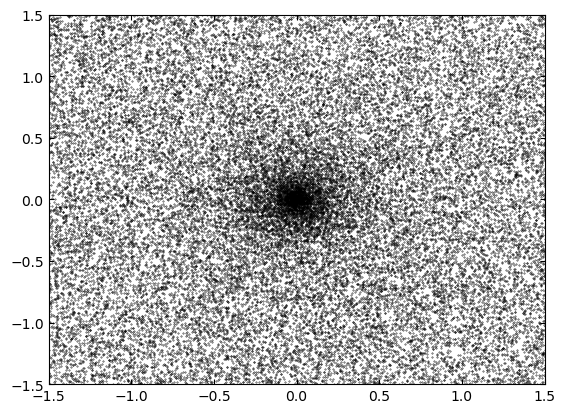

In [350]:
r1x = 0


zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.scatter(zfx, zfy, color = 'black', s = 0.1)


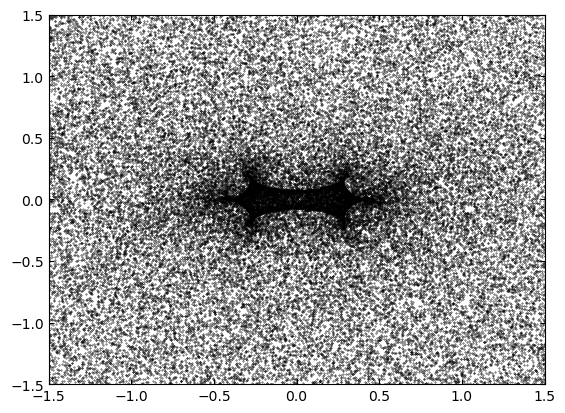

In [351]:
e1 = 0.5     #=> fração da massa 
r1x = -0.75    #=> posição da lente j em relação a origem
r1y = 0
e2 = 0.5     #=> fração da massa 
r2x = 0.75
r2y = 0

zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.scatter(zfx, zfy, color = 'black', s = 0.1)


In [352]:
## Para o mapa de magnificação, preciso de mais pontos
zix = np.random.uniform(low = -2, high = 2, size = 1500000)
ziy = np.random.uniform(low = -2, high = 2,size = 1500000)


## Duas lentes
zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)

(array([[2., 0., 1., ..., 1., 1., 1.],
        [1., 0., 2., ..., 2., 1., 2.],
        [0., 2., 1., ..., 3., 1., 1.],
        ...,
        [1., 2., 1., ..., 2., 2., 2.],
        [1., 1., 1., ..., 1., 1., 3.],
        [1., 1., 1., ..., 0., 0., 2.]]),
 array([-1.32965544, -1.32699532, -1.32433521, ...,  1.32513535,
         1.32779546,  1.33045557]),
 array([-1.28110174, -1.27853931, -1.27597688, ...,  1.27620484,
         1.27876727,  1.2813297 ]),
 <matplotlib.collections.QuadMesh at 0x1c4e74e3a50>)

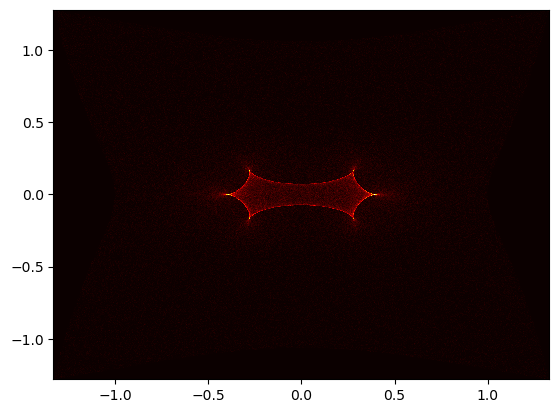

In [353]:
##Mapa de magnificação
plt.hist2d(zfx, zfy, 
           bins = 1000,  
           cmap ="hot")

           #cmin = 0.5)

In [360]:
grid_size = 0.01
x_edges = np.arange(-1.5, 1.5, grid_size)
y_edges = np.arange(-1.5, 1.5, grid_size)

hist, xedges, yedges = np.histogram2d(zfx, zfy, bins=[x_edges, y_edges])

# Calculate bin width and height
bin_width = x_edges[1] - x_edges[0]
bin_height = y_edges[1] - y_edges[0]


In [361]:
passo = 1000
alpha = 0.8
inter = 0
b = inter/np.cos(alpha)

xp = np.linspace(-1.5, 1.5, passo)
yp = np.tan(alpha)*xp + b

In [362]:
density = []

for i in range(0,passo):
    point_x = xp[i]
    point_y = yp[i]

    x_bin = np.digitize(point_x, x_edges) - 1
    y_bin = np.digitize(point_y, y_edges) - 1

    x_bin = min(max(x_bin, 0), hist.shape[0] - 1)
    y_bin = min(max(y_bin, 0), hist.shape[1] - 1)

    num_points_in_bin = hist[x_bin, y_bin]

    density_1 = num_points_in_bin / (bin_width * bin_height)
    density.append(density_1)
    

In [363]:
# Define a moving average kernel
window_size = 5
kernel = np.ones(window_size) / window_size

# Perform convolution to smooth the data
density_smooth = np.convolve(density, kernel, mode='same')

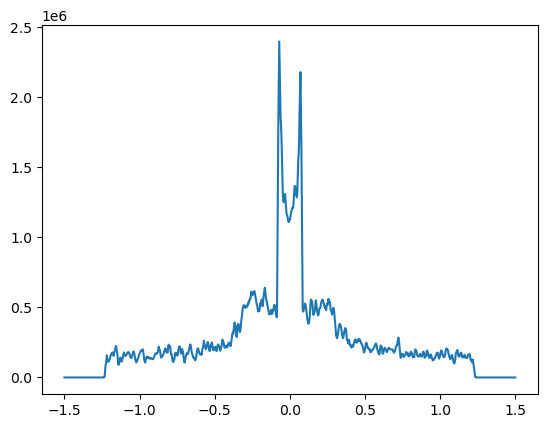

In [364]:
#plt.plot(xp, density)
plt.plot(xp, density_smooth)

Text(0, 0.5, 'Y')

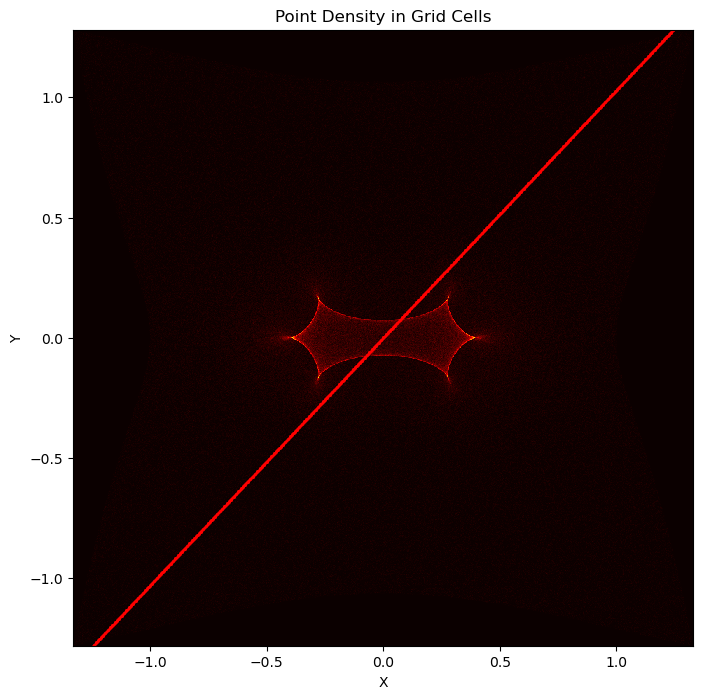

In [115]:
# Plot the histogram and the point
plt.figure(figsize=(8, 8))
#plt.imshow(hist.T, origin='lower', cmap='viridis', interpolation='nearest', alpha=0.5)
plt.hist2d(zfx, zfy, 
           bins = 1000,  
           cmap ="hot")
plt.scatter(xp, yp, c='red', marker='.', s=5)
plt.title('Point Density in Grid Cells')
plt.xlabel('X')
plt.ylabel('Y')


### Com a distribuição de arquimendes

In [414]:
import numpy as np
import matplotlib.pyplot as plt

def arquimedes(num_points):
    
    # Definindo o ângulo de ouro
    golden_angle = np.pi * (3 - np.sqrt(5))
    
    # Cálculo dos ângulos usando o ângulo de ouro
    theta = golden_angle * np.arange(num_points)
    
    # Raio
    r = np.sqrt(theta)
    
    # Coordenadas
    x = r * np.cos(theta)/(num_points/1000)
    y = r * np.sin(theta)/(num_points/1000)

    return x, y


In [432]:
## definição de raio de einsten
## re = sqrt(2* Rs * (Dl/Ds)*(Ds - Dl))

radius = 1


theta = np.linspace(0, 2 * np.pi, 1000)

x = radius * np.cos(theta)
y = radius * np.sin(theta)




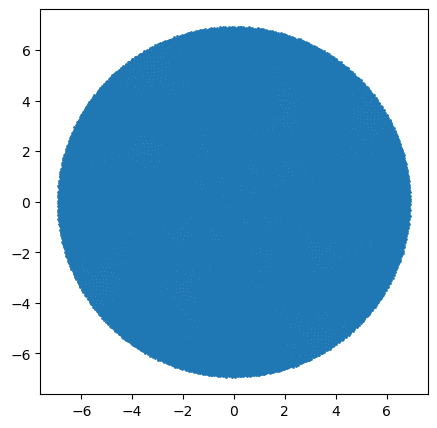

In [415]:
x, y = arquimedes(50000)
plt.figure(figsize=(5, 5))
plt.scatter(x,y, s = 1)

In [416]:
def cart(zix, ziy, r1, r2, e):
    e1 = e[0]     #=> fração da massa 
    r1x = r1[0]    #=> posição da lente j em relação a origem
    r1y = r1[1]
    e2 = e[1]     #=> fração da massa 
    r2x = r2[0]
    r2y = r2[1]


    zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
    zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)
    return zfx, zfy


In [457]:
e = [0.5,0.5] # -> fração da massa
r1 = [-0.75, 0] # -> posição das lentes
r2 = [0.75, 0]

zix, ziy = arquimedes(500000)

x1, y1 = cart(zix, ziy, r1, r2, e)


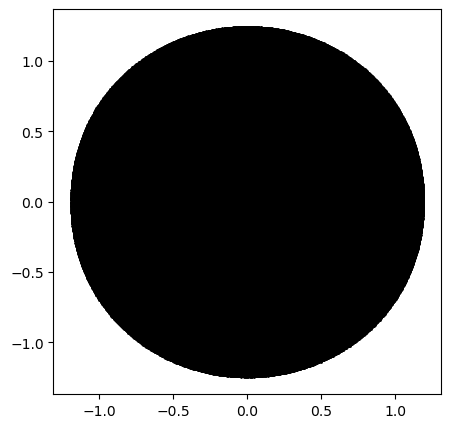

In [458]:
plt.figure(figsize=(5, 5))
plt.scatter(x1, y1, s = 1, c = 'black')
#plt.xlim(-1.5, 1.5)}
#plt.ylim(-1.5,1.5)

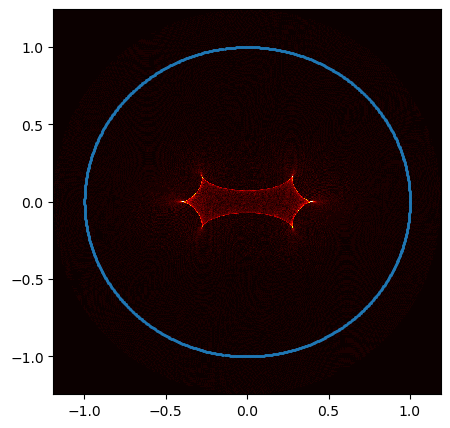

In [459]:
plt.figure(figsize=(5, 5))
plt.hist2d(x1, y1, bins = 1000,  cmap ="hot")

plt.scatter(x, y, s = 1)
#plt.scatter(xp, yp, s = 1, c = 'red')



In [460]:
grid_size = 0.01
x_edges = np.arange(-1.5, 1.5, grid_size)
y_edges = np.arange(-1.5, 1.5, grid_size)

hist, xedges, yedges = np.histogram2d(x1, y1, bins=[x_edges, y_edges])

# Calculate bin width and height
bin_width = x_edges[1] - x_edges[0]
bin_height = y_edges[1] - y_edges[0]

In [461]:
passo = 1000
alpha = 0.8
inter = 0
b = inter/np.cos(alpha)

xp = np.linspace(-1.5, 1.5, passo)
yp = np.tan(alpha)*xp + b


(-1.5, 1.5)

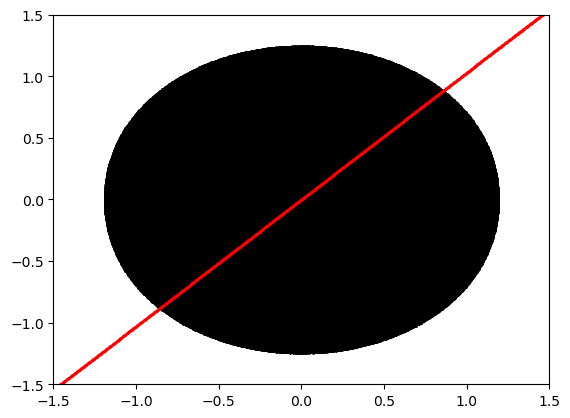

In [462]:
plt.scatter(x1, y1, s = 1, c = 'black')
plt.scatter(xp, yp, s = 1, c = 'red')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5,1.5)

In [463]:
density = []

for i in range(0,passo):
    point_x = xp[i]
    point_y = yp[i]

    x_bin = np.digitize(point_x, x_edges) - 1
    y_bin = np.digitize(point_y, y_edges) - 1

    x_bin = min(max(x_bin, 0), hist.shape[0] - 1)
    y_bin = min(max(y_bin, 0), hist.shape[1] - 1)

    num_points_in_bin = hist[x_bin, y_bin]

    density_1 = num_points_in_bin / (bin_width * bin_height)
    density.append(density_1)
   


In [464]:
# Define a moving average kernel
window_size = 5
kernel = np.ones(window_size) / window_size

# Perform convolution to smooth the data
density_smooth = np.convolve(density, kernel, mode='same')

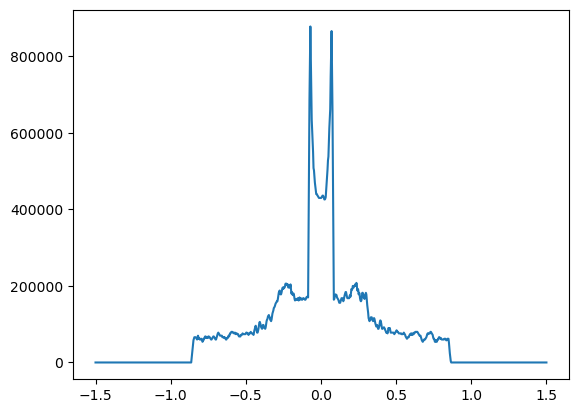

In [465]:
plt.plot(xp, density_smooth)

## magnificação usando monte carlo (?) (+ ou -)

In [466]:
## x1 e y1 já complexos
## zix e ziy

def mag(c, p):
    cont = 0
    for i in range(0,len(p)):
       dist = np.linalg.norm(c - p[i])
       if abs(dist) <= 1: ## re = 1
            count = +1

    return count

In [487]:
xy_zip = zip(x1, y1)
list_xy = list(xy_zip)

TypeError: 'list' object is not callable

: 

: 

: 

TypeError: 'list' object is not callable